# EFSA_study
## A hypothetical toxicological in-vivo experiment

_Gugliemo Cassini, Alessandro Capici e Andrea Prati_


### Problem presentation
A substance X was adiministered to laboratory animals and three endopoint (1, 2 and 3) were measured. Eight groups of animals were tested, 4 groups of males and 4 groups of females.

For each gender, one group was used as a control and each remaining group received one of three doses of substance X (30 mg/kg, 100 mg/kg and 150 mg/kg, administered to each animal daily).
### The goal
It is requested to propose an appropriate statistical model and to analyse these data.

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import xlrd
import time
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import funzioni as fn

# Data visualization
Here the dataset

sex: 1 = female  
sex: 0 = male

In [2]:
data=pd.read_excel('Data/Mini Project EFSA.xlsx')
data.rename(columns={'sex \n(0=M, 1=F)':'sex'}, inplace=True)
data

,response,number of animals,SD,dose,sex,endpoint
0,570.4,9,75.6,0,0,1
1,548.5,10,44.3,30,0,1
2,533.0,10,72.3,100,0,1
3,488.1,9,42.5,150,0,1
4,329.8,10,46.8,0,1,1
5,319.7,10,24.3,30,1,1
6,293.3,10,20.1,100,1,1
7,312.4,10,43.1,150,1,1
8,45.2,9,1.5,0,0,2
9,44.6,10,1.7,30,0,2


## Plot dose-response - request n°1
Plot dose-response data for each pair endpoint-gender (6 plots) with error bars reflecting error size on response measurements.
### Male graphs

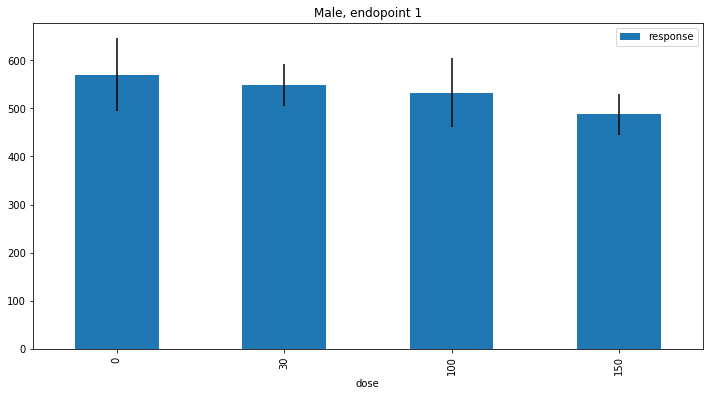

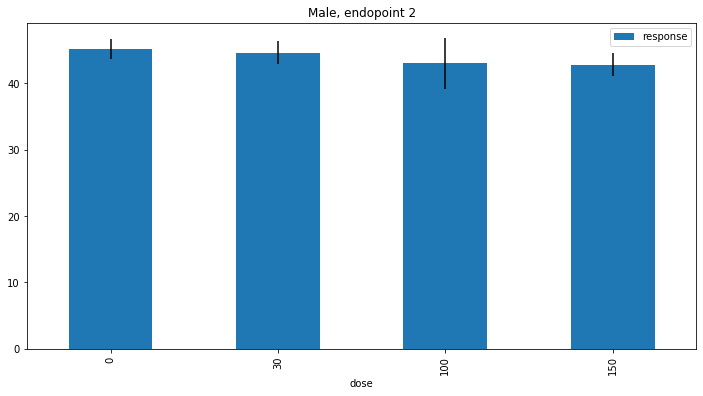

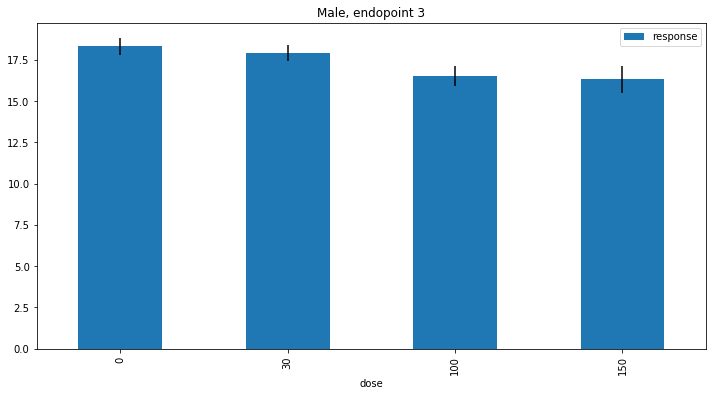

In [3]:
# aggiungere titoli
male_data=data[data.sex==0]

male_data_1=male_data[male_data.endpoint==1]
male_data_1.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Male, endopoint 1")

male_data_2=male_data[male_data.endpoint==2]
male_data_2.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Male, endopoint 2")

male_data_3=male_data[male_data.endpoint==3]
male_data_3.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Male, endopoint 3")

### Female graphs

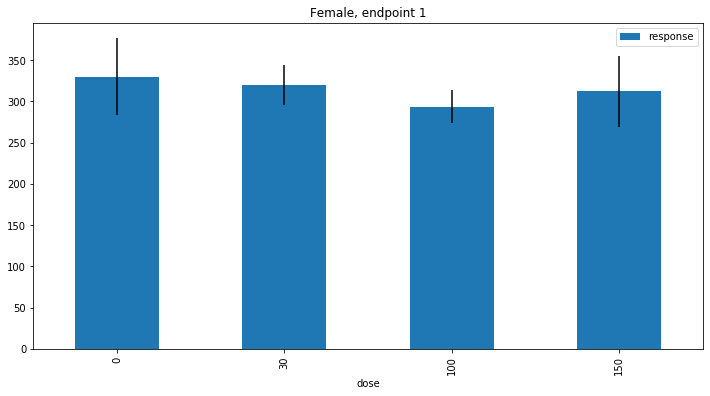

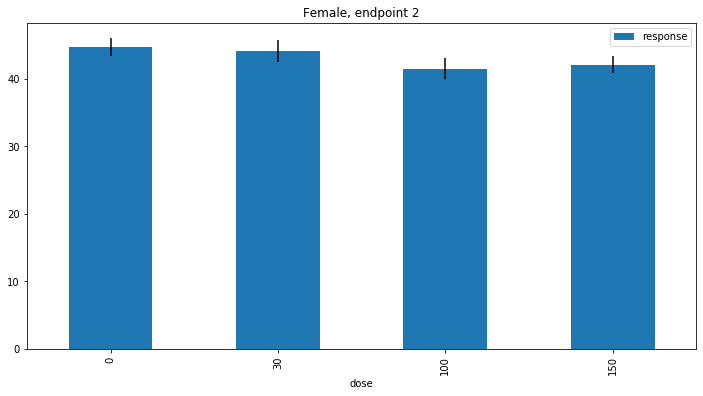

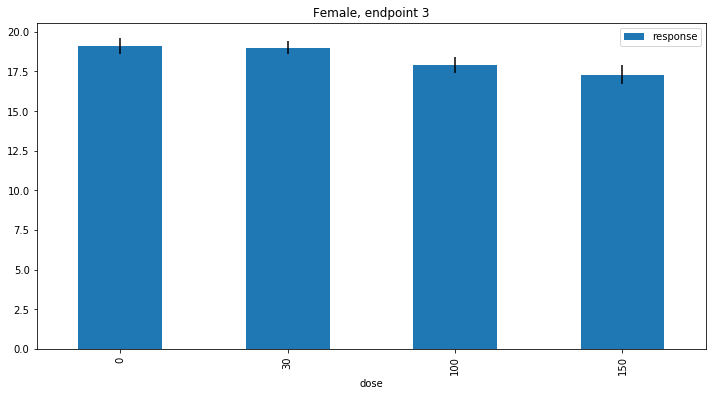

In [4]:
female_data=data[data.sex==1]

female_data_1=female_data[female_data.endpoint==1]
female_data_1.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Female, endpoint 1")

female_data_2=female_data[female_data.endpoint==2]
female_data_2.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Female, endpoint 2")

female_data_3=female_data[female_data.endpoint==3]
female_data_3.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Female, endpoint 3")

# Model computing

In [5]:
data_Endpoint1 = data[data.endpoint == 1]
data_Endpoint2 = data[data.endpoint == 2]
data_Endpoint3 = data[data.endpoint == 3]

## Request n°2
Use subset selection to estimate separate models for the 3 endpoints using gender as categorical variable.

### Endpoint 1

In [6]:
Y= data_Endpoint1.response
weights = data_Endpoint1.SD
X = data_Endpoint1.drop(columns=["response", "SD", "endpoint"])
X = X.reset_index().drop(columns=["index"])
Y = Y.reset_index(drop=True).drop(columns=["index"])

__COMMENTO__

In [7]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

In [8]:
group_of_models_endpoint1_fw = fn.mainForward(X, Y, weights)
group_of_models_endpoint1_bw = fn.mainBackward(X, Y, weights)

group_of_models_endpoint1_fw = fn.compute_criteria(group_of_models_endpoint1_fw)
group_of_models_endpoint1_bw = fn.compute_criteria(group_of_models_endpoint1_bw)

Processed  20 models on 1 predictors in 0.3111598491668701 seconds.
Processed  19 models on 2 predictors in 0.06794595718383789 seconds.
Processed  18 models on 3 predictors in 0.06295657157897949 seconds.
Processed  17 models on 4 predictors in 0.06895828247070312 seconds.
Processed  16 models on 5 predictors in 0.07596111297607422 seconds.
Processed  15 models on 6 predictors in 0.06197023391723633 seconds.
Processed  14 models on 7 predictors in 0.05296969413757324 seconds.
Processed  13 models on 8 predictors in 0.06896185874938965 seconds.
Processed  12 models on 9 predictors in 0.067962646484375 seconds.
Processed  11 models on 10 predictors in 0.038974761962890625 seconds.
Processed  10 models on 11 predictors in 0.049971818923950195 seconds.
Processed  9 models on 12 predictors in 0.05176258087158203 seconds.
Processed  8 models on 13 predictors in 0.03298211097717285 seconds.
Processed  7 models on 14 predictors in 0.023984193801879883 seconds.
Processed  6 models on 15 predic

,RSS,model,number_of_predictors,name_of_predictors,Y_pred
1,1.022109e+05,<statsmodels.regression.linear_model.Regressio...,1,[1],0 424.4 1 424.4 2 424.4 3 424.4 4 ...
2,4.352040e+03,<statsmodels.regression.linear_model.Regressio...,2,"[1, sex]",0 535.0 1 535.0 2 535.0 3 535.0 4 ...
3,1.473722e+03,<statsmodels.regression.linear_model.Regressio...,3,"[1, sex, dose]",0 557.605435 1 547.917391 2 525.31195...
4,3.833485e+02,<statsmodels.regression.linear_model.Regressio...,4,"[1, sex, dose, dose^2 sex]",0 570.716504 1 555.409431 2 519.69292...
5,2.648989e+02,<statsmodels.regression.linear_model.Regressio...,5,"[1, sex, dose, dose^2 sex, number of animals^2...",0 568.124487 1 556.015227 2 527.76028...
6,3.793730e+01,<statsmodels.regression.linear_model.Regressio...,6,"[1, sex, dose, dose^2 sex, number of animals^2...",0 567.763297 1 551.310666 2 532.82603...
7,6.451868e-01,<statsmodels.regression.linear_model.Regressio...,7,"[1, sex, dose, dose^2 sex, number of animals^2...",0 570.687602 1 548.089140 2 533.12325...
8,2.084154e-15,<statsmodels.regression.linear_model.Regressio...,8,"[1, sex, dose, dose^2 sex, number of animals^2...",0 570.4 1 548.5 2 533.0 3 488.1 4 ...
9,2.593998e-19,<statsmodels.regression.linear_model.Regressio...,9,"[1, sex, dose, dose^2 sex, number of animals^2...",0 570.4 1 548.5 2 533.0 3 488.1 4 ...
10,1.791234e-22,<statsmodels.regression.linear_model.Regressio...,10,"[1, sex, dose, dose^2 sex, number of animals^2...",0 570.4 1 548.5 2 533.0 3 488.1 4 ...


,RSS,model,number_of_predictors,name_of_predictors,Y_pred
19,4.719776e-22,<statsmodels.regression.linear_model.Regressio...,19,"[1, number of animals, dose, sex, number of an...",0 570.4 1 548.5 2 533.0 3 488.1 4 ...
18,1.952889e-22,<statsmodels.regression.linear_model.Regressio...,18,"[1, number of animals, dose, sex, number of an...",0 570.4 1 548.5 2 533.0 3 488.1 4 ...
17,1.416482e-22,<statsmodels.regression.linear_model.Regressio...,17,"[1, number of animals, dose, sex, number of an...",0 570.4 1 548.5 2 533.0 3 488.1 4 ...
16,9.783349e-23,<statsmodels.regression.linear_model.Regressio...,16,"[1, number of animals, sex, number of animals ...",0 570.4 1 548.5 2 533.0 3 488.1 4 ...
15,4.104561e-23,<statsmodels.regression.linear_model.Regressio...,15,"[1, number of animals, sex, number of animals ...",0 570.4 1 548.5 2 533.0 3 488.1 4 ...
14,5.792203e-23,<statsmodels.regression.linear_model.Regressio...,14,"[1, number of animals, sex, number of animals ...",0 570.4 1 548.5 2 533.0 3 488.1 4 ...
13,1.505921e-22,<statsmodels.regression.linear_model.Regressio...,13,"[1, number of animals, sex, number of animals ...",0 570.4 1 548.5 2 533.0 3 488.1 4 ...
12,4.913000e-23,<statsmodels.regression.linear_model.Regressio...,12,"[1, number of animals, sex, number of animals ...",0 570.4 1 548.5 2 533.0 3 488.1 4 ...
11,1.667932e-23,<statsmodels.regression.linear_model.Regressio...,11,"[1, number of animals, sex, number of animals ...",0 570.4 1 548.5 2 533.0 3 488.1 4 ...
10,1.055140e-22,<statsmodels.regression.linear_model.Regressio...,10,"[1, number of animals, sex, number of animals ...",0 570.4 1 548.5 2 533.0 3 488.1 4 ...


### Endpoint 2

In [12]:
Y = data_Endpoint2.response
weights = data_Endpoint2.SD
X = data_Endpoint2.drop(columns=["response", "SD", "endpoint"])

In [13]:
X = X.reset_index().drop(columns=["index"])
Y = Y.reset_index(drop=True).drop(columns=["index"])

In [14]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

In [24]:
group_of_models_endpoint2_fw = fn.mainForward(X, Y, weights)
group_of_models_endpoint2_bw = fn.mainBackward(X, Y, weights)

group_of_models_endpoint2_fw = fn.compute_criteria(group_of_models_endpoint2_fw)
group_of_models_endpoint2_bw = fn.compute_criteria(group_of_models_endpoint2_bw)

Processed  56 models on 1 predictors in 0.25585246086120605 seconds.
Processed  55 models on 2 predictors in 0.2248847484588623 seconds.
Processed  54 models on 3 predictors in 0.21738696098327637 seconds.
Processed  53 models on 4 predictors in 0.28722453117370605 seconds.
Processed  52 models on 5 predictors in 0.20788073539733887 seconds.
Processed  51 models on 6 predictors in 0.24686789512634277 seconds.
Processed  50 models on 7 predictors in 0.2128772735595703 seconds.
Processed  49 models on 8 predictors in 0.2508554458618164 seconds.
Processed  48 models on 9 predictors in 0.29582953453063965 seconds.
Processed  47 models on 10 predictors in 0.3488008975982666 seconds.


KeyboardInterrupt: 

### Endpoint 3

In [11]:
Y= data_Endpoint3.response
weights = data_Endpoint3.SD
X = data_Endpoint3.drop(columns=["response", "SD", "endpoint"])
X = X.reset_index().drop(columns=["index"])
Y = Y.reset_index(drop=True).drop(columns=["index"])

In [13]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

In [14]:
group_of_models_endpoint3_fw = fn.mainForward(X, Y, weights)
group_of_models_endpoint3_bw = fn.mainBackward(X, Y, weights)

group_of_models_endpoint3_fw = fn.compute_criteria(group_of_models_endpoint3_fw)
group_of_models_endpoint3_bw = fn.compute_criteria(group_of_models_endpoint3_bw)

Processed  20 models on 1 predictors in 0.11719870567321777 seconds.
Processed  19 models on 2 predictors in 0.07495403289794922 seconds.
Processed  18 models on 3 predictors in 0.06796145439147949 seconds.
Processed  17 models on 4 predictors in 0.06696510314941406 seconds.
Processed  16 models on 5 predictors in 0.0819540023803711 seconds.
Processed  15 models on 6 predictors in 0.05096840858459473 seconds.
Processed  14 models on 7 predictors in 0.05596923828125 seconds.
Processed  13 models on 8 predictors in 0.057967185974121094 seconds.
Processed  12 models on 9 predictors in 0.04697465896606445 seconds.
Processed  11 models on 10 predictors in 0.036977291107177734 seconds.
Processed  10 models on 11 predictors in 0.04397463798522949 seconds.
Processed  9 models on 12 predictors in 0.0479738712310791 seconds.
Processed  8 models on 13 predictors in 0.035979270935058594 seconds.
Processed  7 models on 14 predictors in 0.02497577667236328 seconds.
Processed  6 models on 15 predicto

,RSS,model,number_of_predictors,name_of_predictors,Y_pred
1,7.588750e+00,<statsmodels.regression.linear_model.Regressio...,1,[1],0 17.7875 1 17.7875 2 17.7875 3 17...
2,2.520779e+00,<statsmodels.regression.linear_model.Regressio...,2,"[1, dose]",0 18.736051 1 18.329529 2 17.380978 3...
3,2.095290e-01,<statsmodels.regression.linear_model.Regressio...,3,"[1, dose, number of animals sex]",0 18.198551 1 17.792029 2 16.843478 3...
4,1.538636e-01,<statsmodels.regression.linear_model.Regressio...,4,"[1, dose, number of animals sex, number of ani...",0 18.322727 1 17.677273 2 16.722727 3...
5,1.322784e-01,<statsmodels.regression.linear_model.Regressio...,5,"[1, dose, number of animals sex, number of ani...",0 18.389416 1 17.708394 2 16.691606 3...
6,4.286232e-02,<statsmodels.regression.linear_model.Regressio...,6,"[1, dose, number of animals sex, number of ani...",0 18.300000 1 17.900000 2 16.500000 3...
7,3.538526e-02,<statsmodels.regression.linear_model.Regressio...,7,"[1, dose, number of animals sex, number of ani...",0 18.300000 1 17.900000 2 16.500000 3...
8,3.127717e-20,<statsmodels.regression.linear_model.Regressio...,8,"[1, dose, number of animals sex, number of ani...",0 18.3 1 17.9 2 16.5 3 16.3 4 1...
9,9.783428e-24,<statsmodels.regression.linear_model.Regressio...,9,"[1, dose, number of animals sex, number of ani...",0 18.3 1 17.9 2 16.5 3 16.3 4 1...
10,3.398880e-24,<statsmodels.regression.linear_model.Regressio...,10,"[1, dose, number of animals sex, number of ani...",0 18.3 1 17.9 2 16.5 3 16.3 4 1...


,RSS,model,number_of_predictors,name_of_predictors,Y_pred
19,4.716757e-26,<statsmodels.regression.linear_model.Regressio...,19,"[1, number of animals, dose, sex, number of an...",0 18.3 1 17.9 2 16.5 3 16.3 4 1...
18,1.157164e-25,<statsmodels.regression.linear_model.Regressio...,18,"[1, number of animals, dose, sex, number of an...",0 18.3 1 17.9 2 16.5 3 16.3 4 1...
17,1.878120e-26,<statsmodels.regression.linear_model.Regressio...,17,"[1, number of animals, dose, sex, number of an...",0 18.3 1 17.9 2 16.5 3 16.3 4 1...
16,3.056994e-26,<statsmodels.regression.linear_model.Regressio...,16,"[1, number of animals, dose, sex, number of an...",0 18.3 1 17.9 2 16.5 3 16.3 4 1...
15,2.669505e-26,<statsmodels.regression.linear_model.Regressio...,15,"[number of animals, dose, sex, number of anima...",0 18.3 1 17.9 2 16.5 3 16.3 4 1...
14,8.238232e-26,<statsmodels.regression.linear_model.Regressio...,14,"[number of animals, dose, sex, number of anima...",0 18.3 1 17.9 2 16.5 3 16.3 4 1...
13,4.408786e-26,<statsmodels.regression.linear_model.Regressio...,13,"[number of animals, dose, sex, number of anima...",0 18.3 1 17.9 2 16.5 3 16.3 4 1...
12,4.824042e-26,<statsmodels.regression.linear_model.Regressio...,12,"[number of animals, dose, number of animals se...",0 18.3 1 17.9 2 16.5 3 16.3 4 1...
11,1.687531e-26,<statsmodels.regression.linear_model.Regressio...,11,"[number of animals, dose, number of animals se...",0 18.3 1 17.9 2 16.5 3 16.3 4 1...
10,2.757858e-26,<statsmodels.regression.linear_model.Regressio...,10,"[number of animals, dose, number of animals se...",0 18.3 1 17.9 2 16.5 3 16.3 4 1...


## Request n°3
Use subset selection to estimate a unique model using gender and endpoint as categorical variables.

In [25]:
Y = data.response
weights = data.SD
X = data.drop(columns=["response","SD"])

In [26]:
endpoint1 = X['endpoint'] == 1
endpoint2 = X['endpoint'] == 2
X["endpoint1"] = endpoint1.astype("int")
X["endpoint2"] = endpoint2.astype("int")
X = X.drop(columns=["endpoint"])
X = X.reset_index().drop(columns=["index"])
Y = Y.reset_index(drop=True).drop(columns=["index"])

In [27]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

In [28]:
group_of_models_fw = fn.mainForward(X,Y,weights)
group_of_models_bw = fn.mainBackward(X,Y,weights)

group_of_models_fw = fn.compute_criteria(group_of_models_fw)
group_of_models_bw = fn.compute_criteria(group_of_models_bw)

Processed  56 models on 1 predictors in 0.29183316230773926 seconds.
Processed  55 models on 2 predictors in 0.21088075637817383 seconds.
Processed  54 models on 3 predictors in 0.25385308265686035 seconds.
Processed  53 models on 4 predictors in 0.22387194633483887 seconds.
Processed  52 models on 5 predictors in 0.4087526798248291 seconds.
Processed  51 models on 6 predictors in 0.2842111587524414 seconds.
Processed  50 models on 7 predictors in 0.4308009147644043 seconds.
Processed  49 models on 8 predictors in 0.21487879753112793 seconds.
Processed  48 models on 9 predictors in 0.20203566551208496 seconds.
Processed  47 models on 10 predictors in 0.2868354320526123 seconds.
Processed  46 models on 11 predictors in 0.3838169574737549 seconds.
Processed  45 models on 12 predictors in 0.28613996505737305 seconds.
Processed  44 models on 13 predictors in 0.33997535705566406 seconds.
Processed  43 models on 14 predictors in 0.2658977508544922 seconds.
Processed  42 models on 15 predicto

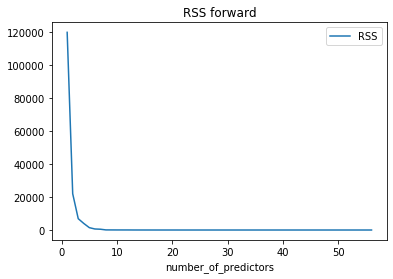

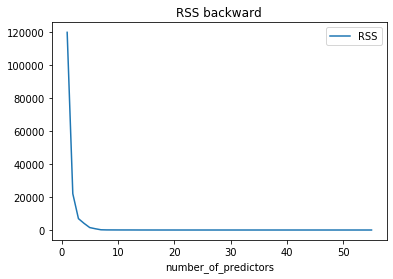

In [29]:
group_of_models_fw.plot(x='number_of_predictors', y='RSS', title = "RSS forward")
group_of_models_bw.plot(x='number_of_predictors', y='RSS', title = "RSS backward")

In [31]:
criteriaToMin = ["bic","aic"]
criteriaToMax = ["adj_rsquare"]

The criteria is: bic
Features: ['1', 'number of animals', 'sex', 'endpoint1', 'number of animals^2', 'number of animals sex', 'number of animals endpoint1', 'number of animals endpoint2', 'dose^2', 'dose sex', 'dose endpoint1', 'dose endpoint2', 'sex^2', 'sex endpoint1', 'sex endpoint2', 'endpoint1^2', 'endpoint1 endpoint2', 'endpoint2^2', 'number of animals^3', 'number of animals^2 dose', 'number of animals^2 sex', 'number of animals^2 endpoint1', 'number of animals^2 endpoint2', 'number of animals dose^2', 'number of animals dose sex', 'number of animals dose endpoint1', 'number of animals dose endpoint2', 'number of animals sex^2', 'number of animals sex endpoint1', 'number of animals sex endpoint2', 'number of animals endpoint1^2', 'number of animals endpoint2^2', 'dose^3', 'dose^2 sex', 'dose^2 endpoint1', 'dose^2 endpoint2', 'dose sex^2', 'dose sex endpoint1', 'dose sex endpoint2', 'dose endpoint1^2', 'sex^3', 'sex^2 endpoint1', 'sex^2 endpoint2', 'sex endpoint1^2', 'sex endpoint

In [54]:
best_models_bw = fn.selectBestForEachCriteria(group_of_models_bw, criteriaToMin, criteriaToMax)
type(group_of_models_bw["bic"][1])

The criteria is: bic
Features: ['1', 'number of animals', 'sex', 'endpoint1', 'number of animals^2', 'number of animals sex', 'number of animals endpoint1', 'number of animals endpoint2', 'dose^2', 'dose sex', 'dose endpoint1', 'dose endpoint2', 'sex^2', 'sex endpoint1', 'sex endpoint2', 'endpoint1^2', 'endpoint1 endpoint2', 'endpoint2^2', 'number of animals^3', 'number of animals^2 dose', 'number of animals^2 sex', 'number of animals^2 endpoint1', 'number of animals^2 endpoint2', 'number of animals dose^2', 'number of animals dose sex', 'number of animals dose endpoint1', 'number of animals dose endpoint2', 'number of animals sex^2', 'number of animals sex endpoint1', 'number of animals sex endpoint2', 'number of animals endpoint1^2', 'number of animals endpoint2^2', 'dose^3', 'dose^2 sex', 'dose^2 endpoint1', 'dose^2 endpoint2', 'dose sex^2', 'dose sex endpoint1', 'dose sex endpoint2', 'dose endpoint1^2', 'sex^3', 'sex^2 endpoint1', 'sex^2 endpoint2', 'sex endpoint1^2', 'sex endpoint

numpy.float64

In [33]:
best_models_fw = fn.selectBestForEachCriteria(group_of_models_fw, criteriaToMin, criteriaToMax)

The criteria is: bic
Features: ['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex endpoint1', 'number of animals dose endpoint1', 'dose^2 endpoint1', 'number of animals^2 dose', 'intercept']
Criteria value: 128.13564865718612
Degrees of freedom: 10.0

The criteria is: aic
Features: ['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex endpoint1', 'number of animals dose endpoint1', 'dose^2 endpoint1', 'number of animals^2 dose', 'number of animals^3', 'number of animals^2 endpoint1', 'dose^3', 'dose^2', 'intercept']
Criteria value: 113.46003857087835
Degrees of freedom: 13.0

The criteria is: adj_rsquare
Features: ['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex endpoint1', 'number of animals dose endpoint1', 'dose^2 endpoint1', 'intercept']
Criteria value: 0.9999008918216894
Degrees of freedom: 9.0



In [34]:
best_models_bw

,RSS,model,number_of_predictors,name_of_predictors,Y_pred,aic,bic,mse,adj_rsquare
bic,40.0128,<statsmodels.regression.linear_model.Regressio...,46,"[1, number of animals, sex, endpoint1, number ...",0 570.400000 1 548.500000 2 533.00...,124.377,150.294,40512,0.999506
aic,40.0128,<statsmodels.regression.linear_model.Regressio...,41,"[1, sex, endpoint1, number of animals^2, numbe...",0 570.400000 1 548.500000 2 533.00...,124.377,150.294,40512,0.999506
adj_rsquare,40.0128,<statsmodels.regression.linear_model.Regressio...,41,"[1, sex, endpoint1, number of animals^2, numbe...",0 570.400000 1 548.500000 2 533.00...,124.377,150.294,40512,0.999506


In [35]:
best_models_fw

,RSS,model,number_of_predictors,name_of_predictors,Y_pred,aic,bic,mse,adj_rsquare
bic,88.8893,<statsmodels.regression.linear_model.Regressio...,9,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 569.095916 1 550.362977 2 532.44...,117.533,128.136,65034.3,0.999909
aic,53.7501,<statsmodels.regression.linear_model.Regressio...,13,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 570.400000 1 548.500000 2 533.00...,113.46,128.775,40512,0.999879
adj_rsquare,103.127,<statsmodels.regression.linear_model.Regressio...,8,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 569.127971 1 550.317185 2 532.45...,119.099,128.523,65034.3,0.999901


In [39]:
best_models_concat =pd.concat([best_models_fw, best_models_bw])
best_models_concat = best_models_concat.reset_index().drop(columns=["index"])

In [40]:
best_models_concat

,RSS,model,number_of_predictors,name_of_predictors,Y_pred,aic,bic,mse,adj_rsquare
0,88.8893,<statsmodels.regression.linear_model.Regressio...,9,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 569.095916 1 550.362977 2 532.44...,117.533,128.136,65034.3,0.999909
1,53.7501,<statsmodels.regression.linear_model.Regressio...,13,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 570.400000 1 548.500000 2 533.00...,113.46,128.775,40512,0.999879
2,103.127,<statsmodels.regression.linear_model.Regressio...,8,"[endpoint1, sex endpoint1, endpoint2, dose end...",0 569.127971 1 550.317185 2 532.45...,119.099,128.523,65034.3,0.999901
3,40.0128,<statsmodels.regression.linear_model.Regressio...,46,"[1, number of animals, sex, endpoint1, number ...",0 570.400000 1 548.500000 2 533.00...,124.377,150.294,40512,0.999506
4,40.0128,<statsmodels.regression.linear_model.Regressio...,41,"[1, sex, endpoint1, number of animals^2, numbe...",0 570.400000 1 548.500000 2 533.00...,124.377,150.294,40512,0.999506
5,40.0128,<statsmodels.regression.linear_model.Regressio...,41,"[1, sex, endpoint1, number of animals^2, numbe...",0 570.400000 1 548.500000 2 533.00...,124.377,150.294,40512,0.999506


In [55]:
type(best_models_concat["adj_rsquare"])

numpy.float64

In [47]:
best_models_all = fn.selectBestForEachCriteria(best_models_concat, criteriaToMin, criteriaToMax)

The criteria is: bic


TypeError: reduction operation 'argmin' not allowed for this dtype